- 제주도민과 타지인을 구별하여 상관관계 확인
- 제주도민에는 제주 거주 내국인+장기체류 거주지역 제주 외국인
- 타지인에는 그외 거주 내국인+ 장기체류 거주지역 그외 외국인 +단기체류 외국인

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
f_name=font_manager.FontProperties(fname='C:/Windows/Fonts/NGULIM.ttf').get_name()
rc('font',family=f_name)
from plotnine import *
import seaborn as sns

In [2]:
korean = pd.read_pickle('eco jeju/02-1_내국인유동인구_KOREAN.pickle')

In [3]:
korean.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주


In [4]:
waste=pd.read_csv("eco jeju/01_음식물쓰레기_FOOD_WASTE_210811_update.csv",encoding="CP949",low_memory=False)
waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211445 entries, 0 to 2211444
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   base_date   object
 1   city        object
 2   emd_cd      object
 3   emd_nm      object
 4   em_area_cd  object
 5   em_cnt      int64 
 6   em_g        int64 
 7   pay_amt     int64 
dtypes: int64(3), object(5)
memory usage: 135.0+ MB


In [5]:
frgn_long=pd.read_csv("eco jeju/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.csv",encoding="CP949",low_memory=False)
frgn_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23837317 entries, 0 to 23837316
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   nationality    object 
 3   city           object 
 4   emd_cd         int64  
 5   emd_nm         object 
 6   resd_pop_cnt   float64
 7   work_pop_cnt   float64
 8   visit_pop_cnt  float64
 9   resd           object 
dtypes: float64(3), int64(2), object(5)
memory usage: 1.8+ GB


In [6]:
frgn_short=pd.read_csv("eco jeju/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.csv",encoding="CP949",low_memory=False)
frgn_short.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078


# 데이터 전처리

In [7]:
waste['year']=waste.base_date.apply(lambda x: x.split("-")[0]).astype(int)
waste['month']=waste.base_date.apply(lambda x: x.split("-")[1]).astype(int)

In [8]:
frgn_long['year']=frgn_long.base_date.apply(lambda x: x.split("-")[0]).astype(int)
frgn_long['month']=frgn_long.base_date.apply(lambda x: x.split("-")[1]).astype(int)

In [9]:
frgn_short['year']=frgn_short.base_date.apply(lambda x: x.split("-")[0]).astype(int)
frgn_short['month']=frgn_short.base_date.apply(lambda x: x.split("-")[1]).astype(int)

# 일별 읍면동별 평균 유동인구 + 총 배출량

In [10]:
korean_day=pd.pivot_table(korean,index=['base_date','emd_nm','resd','sex'],columns=['age'],values=['resd_pop_cnt','work_pop_cnt','visit_pop_cnt'])

In [11]:
korean_day['resd_total']=korean_day['resd_pop_cnt'].sum(axis=1)
korean_day['work_total']=korean_day['work_pop_cnt'].sum(axis=1)
korean_day['visit_total']=korean_day['visit_pop_cnt'].sum(axis=1)


In [12]:
korean_day=korean_day[['resd_total','work_total','visit_total']]

In [13]:
korean_day=korean_day.reset_index()

In [14]:
korean_day['base_date']=korean_day['base_date'].astype(str)

In [15]:
korean_day=pd.pivot_table(korean_day,index=['base_date','emd_nm'],columns=['resd'],values=['resd_total','work_total','visit_total'],
                         aggfunc='sum')

C:\Users\lg_gram\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.


In [16]:
waste_day=waste[['base_date','emd_nm','em_g']].groupby(['base_date','emd_nm']).sum()

In [17]:
frgn_lday=frgn_long[['base_date','emd_nm','nationality','resd','resd_pop_cnt','work_pop_cnt','visit_pop_cnt']].groupby(['base_date','emd_nm','resd','nationality']).mean()
frgn_lday.head()

resd_pop_cnt  work_pop_cnt  visit_pop_cnt
base_date  emd_nm resd nationality                                           
2018-01-01 건입동    그외   CAN                   0.0      0.000000       4.543800
                       CHN                   0.0     14.157633      63.237150
                       ETC                   0.0      0.000000       3.689829
                       IDN                   0.0      0.000000       7.668608
                       LKA                   0.0      0.000000       5.665350

In [18]:
frgn_lday=frgn_lday.reset_index()

In [19]:
frgn_lday=pd.pivot_table(frgn_lday,index=['base_date','emd_nm'],columns=['resd'],values=['resd_pop_cnt','work_pop_cnt','visit_pop_cnt'],
                         aggfunc='sum')


In [20]:
frgn_sday=pd.pivot_table(frgn_short,index=['base_date','emd_nm'],columns=['nationality'],values=['visit_pop_cnt'])
#평균 내는게 맞는걸까?

In [21]:
frgn_sday['total_visit']=frgn_sday.sum(axis=1)

In [22]:
frgn_sday=frgn_sday['total_visit']

In [23]:
day=pd.merge(waste_day,frgn_lday,left_index=True,right_index=True,how="outer")

C:\Users\lg_gram\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)


In [24]:
day.rename(columns={('resd_pop_cnt', '그외'):'그외,거주lf',('resd_pop_cnt', '제주'):'제주,거주lf',('visit_pop_cnt', '그외'):'그외,방문lf',
                   ('visit_pop_cnt', '제주'):'제주,방문lf',('work_pop_cnt', '그외'):'그외,근무lf',('work_pop_cnt', '제주'):'제주,근무lf'},inplace=True)

In [25]:
day['그외,totallf']=day['그외,거주lf']+day['그외,방문lf']+day['그외,근무lf']
day['제주,totallf']=day['제주,거주lf']+day['제주,방문lf']+day['제주,근무lf']

In [26]:
day=pd.merge(day,frgn_sday,left_index=True,right_index=True,how="outer")

In [27]:
day.rename(columns={'total_visit':'visit_sf'},inplace=True)

In [28]:
day

em_g  그외,거주lf      제주,거주lf     그외,방문lf     제주,방문lf  \
base_date  emd_nm                                                            
2018-01-01 건입동     1708250.0      0.0   188.668452  147.376022  114.791616   
           구좌읍           NaN      0.0   311.677251  117.189959   98.196469   
           남원읍     1239600.0      0.0   291.397025   99.287885   89.657117   
           노형동     9357900.0      0.0  1848.283315  185.863164  366.630124   
           대륜동     1717700.0      0.0   155.741460   87.224844  107.985558   
...                      ...      ...          ...         ...         ...   
2021-06-30 표선면     1377450.0      0.0   167.198474  118.917936   61.707895   
           한경면      973850.0      0.0   282.151610  142.152807  117.810684   
           한림읍     3298100.0      0.0  1029.187129  454.439919  203.495021   
           화북동     3749600.0      0.0   263.077421   69.042126   73.754342   
           효돈동     1011050.0      0.0    46.081071   51.696853   29.022188   

                     그외,근무lf    제주,근무lf  그외,totallf   제주,totallf    visit_sf  
base_date  emd_nm                                                             
2018-01-01 건입동     17.250025  15.992237  164.626047   319.452305  228.545205  
           구좌읍     30.082107   8.140573  147.272066   418.014294  128.056388  
           남원읍     47.400908   5.835813  146.688793   386.889955  164.404833  
           노형동     35.623638  98.164108  221.486802  2313.077547  512.128052  
           대륜동      8.191600   6.259879   95.416444   269.986897   78.202296  
...                      ...        ...         ...          ...         ...  
2021-06-30 표선면      9.385276  16.180000  128.303212   245.086369    4.967003  
           한경면      0.000000  12.591437  142.152807   412.553731    1.533775  
           한림읍     18.389321  40.316271  472.829240  1272.998421    3.088071  
           화북동      0.000000  43.401825   69.042126   380.233588    1.983533  
           효돈동      0.000000   7.445300   51.696853    82.548560    0.921200  

[55824 rows x 10 columns]

In [29]:
day=pd.merge(day,korean_day,left_index=True,right_index=True,how="outer")
day

C:\Users\lg_gram\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)


em_g  그외,거주lf      제주,거주lf     그외,방문lf     제주,방문lf  \
base_date  emd_nm                                                            
2018-01-01 건입동     1708250.0      0.0   188.668452  147.376022  114.791616   
           구좌읍           NaN      0.0   311.677251  117.189959   98.196469   
           남원읍     1239600.0      0.0   291.397025   99.287885   89.657117   
           노형동     9357900.0      0.0  1848.283315  185.863164  366.630124   
           대륜동     1717700.0      0.0   155.741460   87.224844  107.985558   
...                      ...      ...          ...         ...         ...   
2021-06-30 표선면     1377450.0      0.0   167.198474  118.917936   61.707895   
           한경면      973850.0      0.0   282.151610  142.152807  117.810684   
           한림읍     3298100.0      0.0  1029.187129  454.439919  203.495021   
           화북동     3749600.0      0.0   263.077421   69.042126   73.754342   
           효돈동     1011050.0      0.0    46.081071   51.696853   29.022188   

                     그외,근무lf    제주,근무lf  그외,totallf   제주,totallf    visit_sf  \
base_date  emd_nm                                                              
2018-01-01 건입동     17.250025  15.992237  164.626047   319.452305  228.545205   
           구좌읍     30.082107   8.140573  147.272066   418.014294  128.056388   
           남원읍     47.400908   5.835813  146.688793   386.889955  164.404833   
           노형동     35.623638  98.164108  221.486802  2313.077547  512.128052   
           대륜동      8.191600   6.259879   95.416444   269.986897   78.202296   
...                      ...        ...         ...          ...         ...   
2021-06-30 표선면      9.385276  16.180000  128.303212   245.086369    4.967003   
           한경면      0.000000  12.591437  142.152807   412.553731    1.533775   
           한림읍     18.389321  40.316271  472.829240  1272.998421    3.088071   
           화북동      0.000000  43.401825   69.042126   380.233588    1.983533   
           효돈동      0.000000   7.445300   51.696853    82.548560    0.921200   

                   (resd_total, , 그외)  (resd_total, , 제주)  \
base_date  emd_nm                                           
2018-01-01 건입동                    0.0         7086.222050   
           구좌읍                    0.0        11212.172696   
           남원읍                    0.0        11852.424667   
           노형동                    0.0        48812.404250   
           대륜동                    0.0        11029.834179   
...                               ...                 ...   
2021-06-30 표선면                    0.0         9970.182508   
           한경면                    0.0         6975.744212   
           한림읍                    0.0        19603.540783   
           화북동                    0.0        23854.191400   
           효돈동                    0.0         3680.073429   

                   (visit_total, , 그외)  (visit_total, , 제주)  \
base_date  emd_nm                                             
2018-01-01 건입동             2523.585242          5066.987725   
           구좌읍             5279.497346          4822.281463   
           남원읍             4471.270475          4438.772808   
           노형동             5603.812746         12088.288813   
           대륜동             3927.939325          4768.766004   
...                                ...                  ...   
2021-06-30 표선면             4377.772483          2207.710958   
           한경면             2362.742967          1744.183983   
           한림읍             7687.022283          4269.277700   
           화북동             1957.777958          8085.904954   
           효돈동              762.684392          1051.034492   

                   (work_total, , 그외)  (work_total, , 제주)  
base_date  emd_nm                                          
2018-01-01 건입동             102.181369          691.625067  
           구좌읍             185.635017          515.499808  
           남원읍             172.827388          565.610250  
           노형동             358.619796         2634.417

In [30]:
day.rename(columns={('resd_total', '', '그외'):'그외,거주_d',('resd_total', '', '제주'):'제주,거주_d',('visit_total', '', '그외'):'그외,방문_d',
                   ('visit_total', '', '제주'):'제주,방문_d',('work_total', '', '그외'):'그외,근무_d',('work_total', '', '제주'):'제주,근무_d'},inplace=True)
day.head()

em_g  그외,거주lf      제주,거주lf     그외,방문lf     제주,방문lf  \
base_date  emd_nm                                                            
2018-01-01 건입동     1708250.0      0.0   188.668452  147.376022  114.791616   
           구좌읍           NaN      0.0   311.677251  117.189959   98.196469   
           남원읍     1239600.0      0.0   291.397025   99.287885   89.657117   
           노형동     9357900.0      0.0  1848.283315  185.863164  366.630124   
           대륜동     1717700.0      0.0   155.741460   87.224844  107.985558   

                     그외,근무lf    제주,근무lf  그외,totallf   제주,totallf    visit_sf  \
base_date  emd_nm                                                              
2018-01-01 건입동     17.250025  15.992237  164.626047   319.452305  228.545205   
           구좌읍     30.082107   8.140573  147.272066   418.014294  128.056388   
           남원읍     47.400908   5.835813  146.688793   386.889955  164.404833   
           노형동     35.623638  98.164108  221.486802  2313.077547  512.128052   
           대륜동      8.191600   6.259879   95.416444   269.986897   78.202296   

                   그외,거주_d       제주,거주_d      그외,방문_d       제주,방문_d  \
base_date  emd_nm                                                     
2018-01-01 건입동         0.0   7086.222050  2523.585242   5066.987725   
           구좌읍         0.0  11212.172696  5279.497346   4822.281463   
           남원읍         0.0  11852.424667  4471.270475   4438.772808   
           노형동         0.0  48812.404250  5603.812746  12088.288813   
           대륜동         0.0  11029.834179  3927.939325   4768.766004   

                      그외,근무_d      제주,근무_d  
base_date  emd_nm                           
2018-01-01 건입동     102.181369   691.625067  
           구좌읍     185.635017   515.499808  
           남원읍     172.827388   565.610250  
           노형동     358.619796  2634.417838  
           대륜동     135.999988   695.755721

In [31]:
day['그외,total_d']=day['그외,거주_d']+day['그외,방문_d']+day['그외,근무_d']
day['제주,total_d']=day['제주,거주_d']+day['제주,방문_d']+day['제주,근무_d']

In [32]:
day.drop(columns=['그외,거주lf','그외,거주_d'],inplace=True)

In [33]:
day['타지인_total']=day['그외,totallf']+day['그외,total_d']+day['visit_sf']
day['제주도민_total']=day['제주,totallf']+day['제주,total_d']


In [34]:
day.fillna(0)

em_g      제주,거주lf     그외,방문lf     제주,방문lf    그외,근무lf  \
base_date  emd_nm                                                              
2018-01-01 건입동     1708250.0   188.668452  147.376022  114.791616  17.250025   
           구좌읍           0.0   311.677251  117.189959   98.196469  30.082107   
           남원읍     1239600.0   291.397025   99.287885   89.657117  47.400908   
           노형동     9357900.0  1848.283315  185.863164  366.630124  35.623638   
           대륜동     1717700.0   155.741460   87.224844  107.985558   8.191600   
...                      ...          ...         ...         ...        ...   
2021-06-30 표선면     1377450.0   167.198474  118.917936   61.707895   9.385276   
           한경면      973850.0   282.151610  142.152807  117.810684   0.000000   
           한림읍     3298100.0  1029.187129  454.439919  203.495021  18.389321   
           화북동     3749600.0   263.077421   69.042126   73.754342   0.000000   
           효돈동     1011050.0    46.081071   51.696853   29.022188   0.000000   

                     제주,근무lf  그외,totallf   제주,totallf    visit_sf  \
base_date  emd_nm                                                   
2018-01-01 건입동     15.992237  164.626047   319.452305  228.545205   
           구좌읍      8.140573  147.272066   418.014294  128.056388   
           남원읍      5.835813  146.688793   386.889955  164.404833   
           노형동     98.164108  221.486802  2313.077547  512.128052   
           대륜동      6.259879   95.416444   269.986897   78.202296   
...                      ...         ...          ...         ...   
2021-06-30 표선면     16.180000  128.303212   245.086369    4.967003   
           한경면     12.591437  142.152807   412.553731    1.533775   
           한림읍     40.316271  472.829240  1272.998421    3.088071   
           화북동     43.401825   69.042126   380.233588    1.983533   
           효돈동      7.445300   51.696853    82.548560    0.921200   

                        제주,거주_d      그외,방문_d       제주,방문_d     그외,근무_d  \
base_date  emd_nm                                                        
2018-01-01 건입동      7086.222050  2523.585242   5066.987725  102.181369   
           구좌읍     11212.172696  5279.497346   4822.281463  185.635017   
           남원읍     11852.424667  4471.270475   4438.772808  172.827388   
           노형동     48812.404250  5603.812746  12088.288813  358.619796   
           대륜동     11029.834179  3927.939325   4768.766004  135.999988   
...                         ...          ...           ...         ...   
2021-06-30 표선면      9970.182508  4377.772483   2207.710958  199.635454   
           한경면      6975.744212  2362.742967   1744.183983  111.796933   
           한림읍     19603.540783  7687.022283   4269.277700  367.038646   
           화북동     23854.191400  1957.777958   8085.904954  240.200762   
           효돈동      3680.073429   762.684392   1051.034492   29.143179   

                       제주,근무_d   그외,total_d    제주,total_d    타지인_total  \
base_date  emd_nm                                                        
2018-01-01 건입동      691.625067  2625.766610  12844.834842  3018.937862   
           구좌읍      515.499808  5465.132363  16549.953967  5740.460816   
           남원읍      565.610250  4644.097862  16856.807725  4955.191489   
           노형동     2634.417838  5962.432542  63535.110900  6696.047395   
           대륜동      695.755721  4063.939313  16494.355904  4237.558052   
...                        ...          ...           ...          ...   
2021-06-30 표선면      780.404479  4577.407937  12958.297946  4710.678153   
           한경면      556.104004  2474.539900   9276.032200  2618.226482   
           한림읍     1682.674125  8054.060929  25555.492608  8529.978240   
           화북동     1849.491483  2197.978721  33789.587838  2269.004380   
           효돈동      191.322946   791.827571   4922.430867   844.445624   

                     제주도민_total  
base_date  emd_nm                
2018-01-01 건입동     13164.287146  
           구좌읍     16967.968260  
           남원읍     1724

<AxesSubplot:>

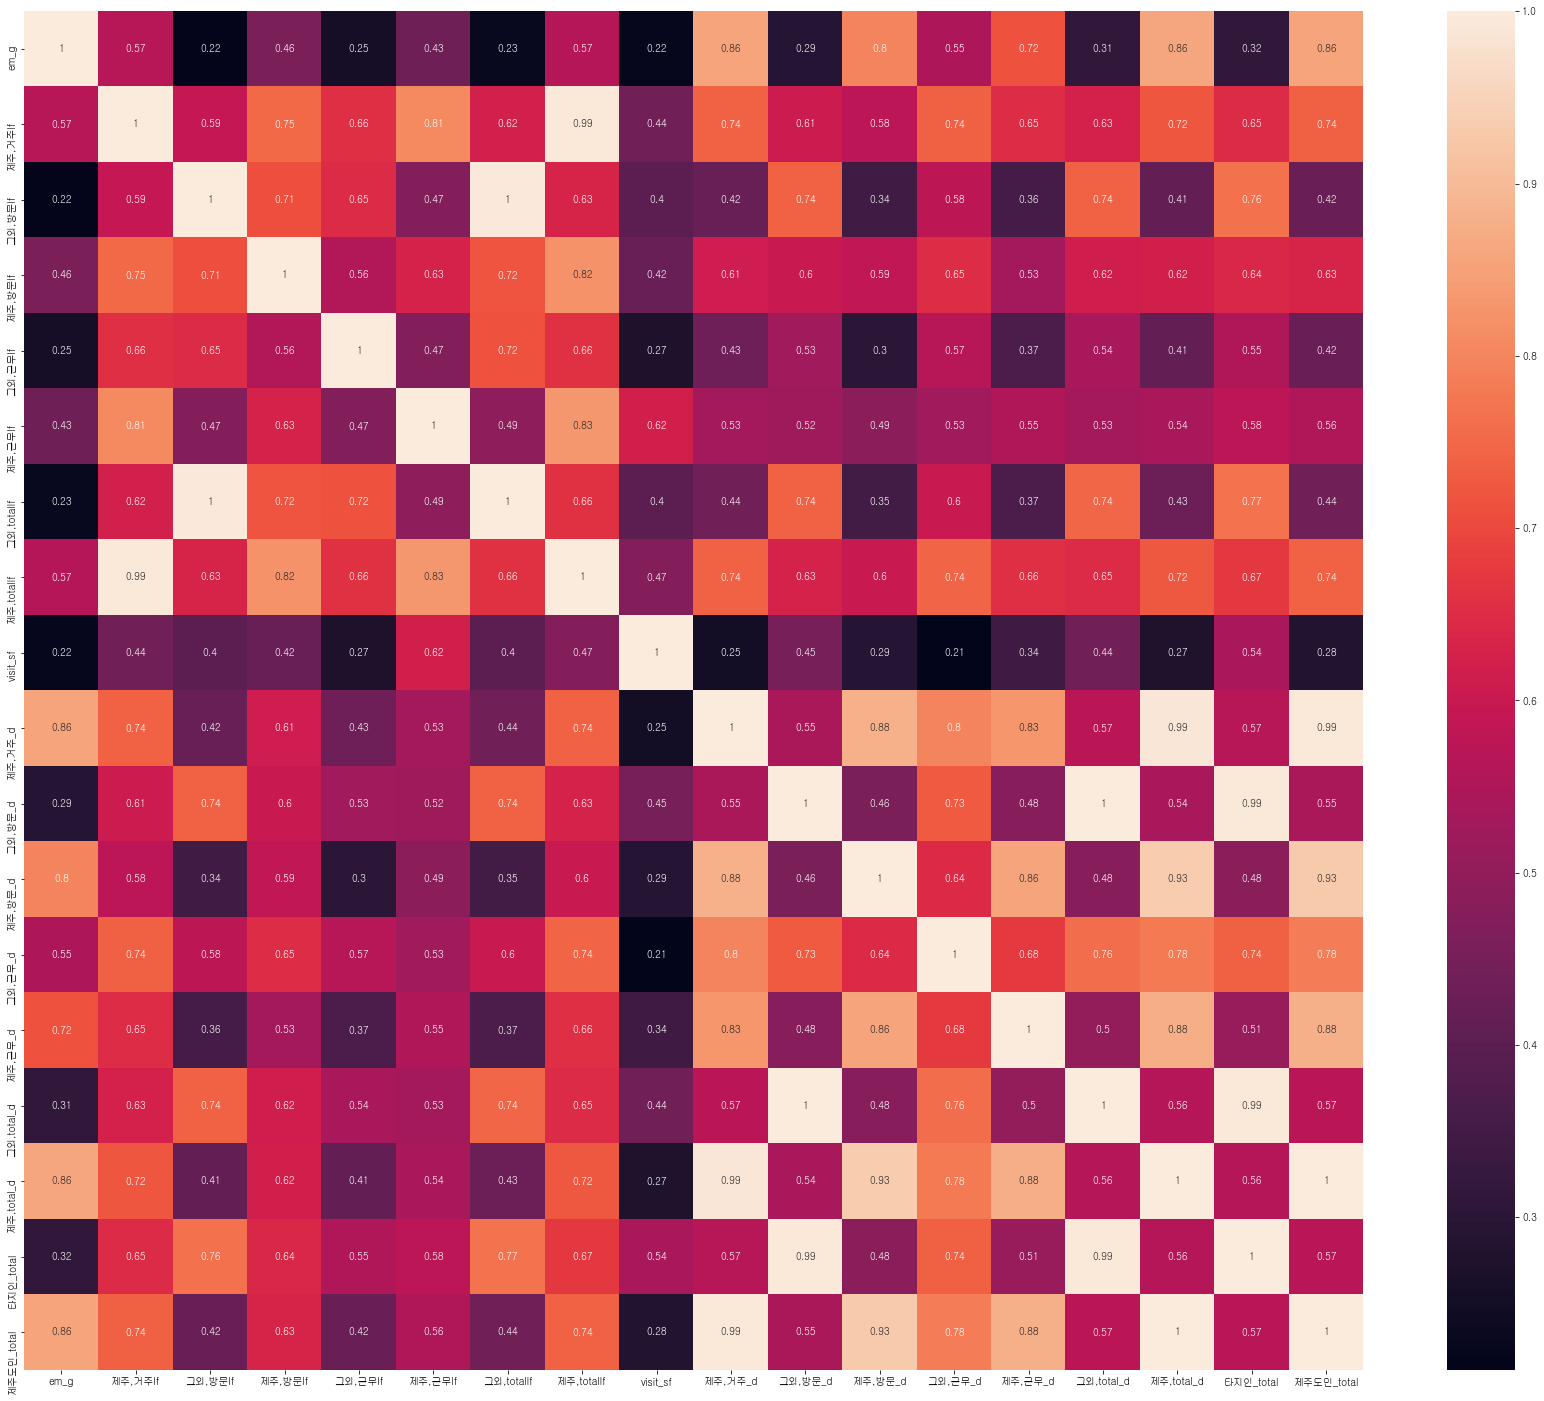

In [37]:
day_corr=day.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(day_corr, annot=True)

In [40]:
day_corr=day.corr().style.background_gradient(cmap='summer_r')

,em_g,"제주,거주lf","그외,방문lf","제주,방문lf","그외,근무lf","제주,근무lf","그외,totallf","제주,totallf",visit_sf,"제주,거주_d","그외,방문_d","제주,방문_d","그외,근무_d","제주,근무_d","그외,total_d","제주,total_d",타지인_total,제주도민_total
em_g,1.000000,0.566351,0.216664,0.459046,0.254616,0.430619,0.227721,0.565541,0.221019,0.856880,0.290109,0.799731,0.547416,0.715559,0.313854,0.859877,0.315182,0.857659
"제주,거주lf",0.566351,1.000000,0.591710,0.750542,0.657631,0.808969,0.622911,0.992097,0.439945,0.740642,0.606672,0.577732,0.736656,0.651603,0.626360,0.719825,0.646845,0.736109
"그외,방문lf",0.216664,0.591710,1.000000,0.709937,0.647428,0.474040,0.995585,0.632715,0.401111,0.422098,0.738392,0.344343,0.579471,0.355984,0.740546,0.412382,0.764613,0.423967
"제주,방문lf",0.459046,0.750542,0.709937,1.000000,0.558283,0.627256,0.718952,0.821810,0.423320,0.613769,0.601367,0.586500,0.649294,0.528772,0.615319,0.620041,0.639696,0.632919
"그외,근무lf",0.254616,0.657631,0.647428,0.558283,1.000000,0.470995,0.716108,0.658885,0.272150,0.433436,0.527532,0.303568,0.568601,0.369316,0.539704,0.412418,0.552741,0.424919
"제주,근무lf",0.430619,0.808969,0.474040,0.627256,0.470995,1.000000,0.492157,0.832998,0.620236,0.531654,0.521367,0.486774,0.526158,0.550833,0.530935,0.539978,0.577091,0.555305
"그외,totallf",0.227721,0.622911,0.995585,0.718952,0.716108,0.492157,1.000000,0.660620,0.400975,0.439960,0.741226,0.352753,0.600736,0.371512,0.744698,0.428473,0.768545,0.440622
"제주,totallf",0.565541,0.992097,0.632715,0.821810,0.658885,0.832998,0.660620,1.000000,0.473346,0.739552,0.629555,0.601159,0.742091,0.655181,0.648450,0.724654,0.672782,0.741090
visit_sf,0.221019,0.439945,0.401111,0.423320,0.272150,0.620236,0.400975,0.473346,1.000000,0.248599,0.449406,0.291433,0.211374,0.343481,0.441081,0.274164,0.540047,0.283738
"제주,거주_d",0.856880,0.740642,0.422098,0.613769,0.433436,0.531654,0.439960,0.739552,0.248599,1.000000,0.546309,0.881465,0.798551,0.829770,0.573336,0.990757,0.566676,0.991225


- lf가 붙은 columns은 장기 체류 외국인 국적 상관없이 평균 값
- d가 붙은 columns은 내국인 유동인구 값
- 그외 totallf : 거주지역이 그외인 장기 체류 외국인의 일평균 읍동면별 총 유동인구
- 제주 totallf : 거주지역이 제주인 장기 체류 외국인의 일평균 읍동면별 총 유동인구
- 그외 total_d : 거주지역이 그외인 내국인의 일평균 읍동면별 총 유동인구
- 제주 total_d : 거주지역이 제주인 내국인의 일평균 읍동면별 총 유동인구
- visit_sf : 단기체류 외국인
- 그외,거주lf는 0값이라 drop

In [65]:
#total 값만 모아보기
day_h=day[['em_g','타지인_total','제주도민_total','그외,totallf','제주,totallf','그외,total_d','제주,total_d','visit_sf']]
day_h.fillna(0)

em_g    타지인_total    제주도민_total  그외,totallf  \
base_date  emd_nm                                                     
2018-01-01 건입동     1708250.0  3018.937862  13164.287146  164.626047   
           구좌읍           0.0  5740.460816  16967.968260  147.272066   
           남원읍     1239600.0  4955.191489  17243.697680  146.688793   
           노형동     9357900.0  6696.047395  65848.188447  221.486802   
           대륜동     1717700.0  4237.558052  16764.342801   95.416444   
...                      ...          ...           ...         ...   
2021-06-30 표선면     1377450.0  4710.678153  13203.384315  128.303212   
           한경면      973850.0  2618.226482   9688.585931  142.152807   
           한림읍     3298100.0  8529.978240  26828.491029  472.829240   
           화북동     3749600.0  2269.004380  34169.821426   69.042126   
           효돈동     1011050.0   844.445624   5004.979426   51.696853   

                    제주,totallf   그외,total_d    제주,total_d    visit_sf  
base_date  emd_nm                                                      
2018-01-01 건입동      319.452305  2625.766610  12844.834842  228.545205  
           구좌읍      418.014294  5465.132363  16549.953967  128.056388  
           남원읍      386.889955  4644.097862  16856.807725  164.404833  
           노형동     2313.077547  5962.432542  63535.110900  512.128052  
           대륜동      269.986897  4063.939313  16494.355904   78.202296  
...                        ...          ...           ...         ...  
2021-06-30 표선면      245.086369  4577.407937  12958.297946    4.967003  
           한경면      412.553731  2474.539900   9276.032200    1.533775  
           한림읍     1272.998421  8054.060929  25555.492608    3.088071  
           화북동      380.233588  2197.978721  33789.587838    1.983533  
           효돈동       82.548560   791.827571   4922.430867    0.921200  

[55824 rows x 8 columns]

In [66]:
day_h_corr=day_h.corr().style.background_gradient(cmap='summer_r')
day_h_corr

,em_g,타지인_total,제주도민_total,"그외,totallf","제주,totallf","그외,total_d","제주,total_d",visit_sf
em_g,1.000000,0.315182,0.857659,0.227721,0.565541,0.313854,0.859877,0.221019
타지인_total,0.315182,1.000000,0.570346,0.768545,0.672782,0.992930,0.561146,0.540047
제주도민_total,0.857659,0.570346,1.000000,0.440622,0.741090,0.573157,0.999708,0.283738
"그외,totallf",0.227721,0.768545,0.440622,1.000000,0.660620,0.744698,0.428473,0.400975
"제주,totallf",0.565541,0.672782,0.741090,0.660620,1.000000,0.648450,0.724654,0.473346
"그외,total_d",0.313854,0.992930,0.573157,0.744698,0.648450,1.000000,0.564941,0.441081
"제주,total_d",0.859877,0.561146,0.999708,0.428473,0.724654,0.564941,1.000000,0.274164
visit_sf,0.221019,0.540047,0.283738,0.400975,0.473346,0.441081,0.274164,1.000000


<AxesSubplot:>

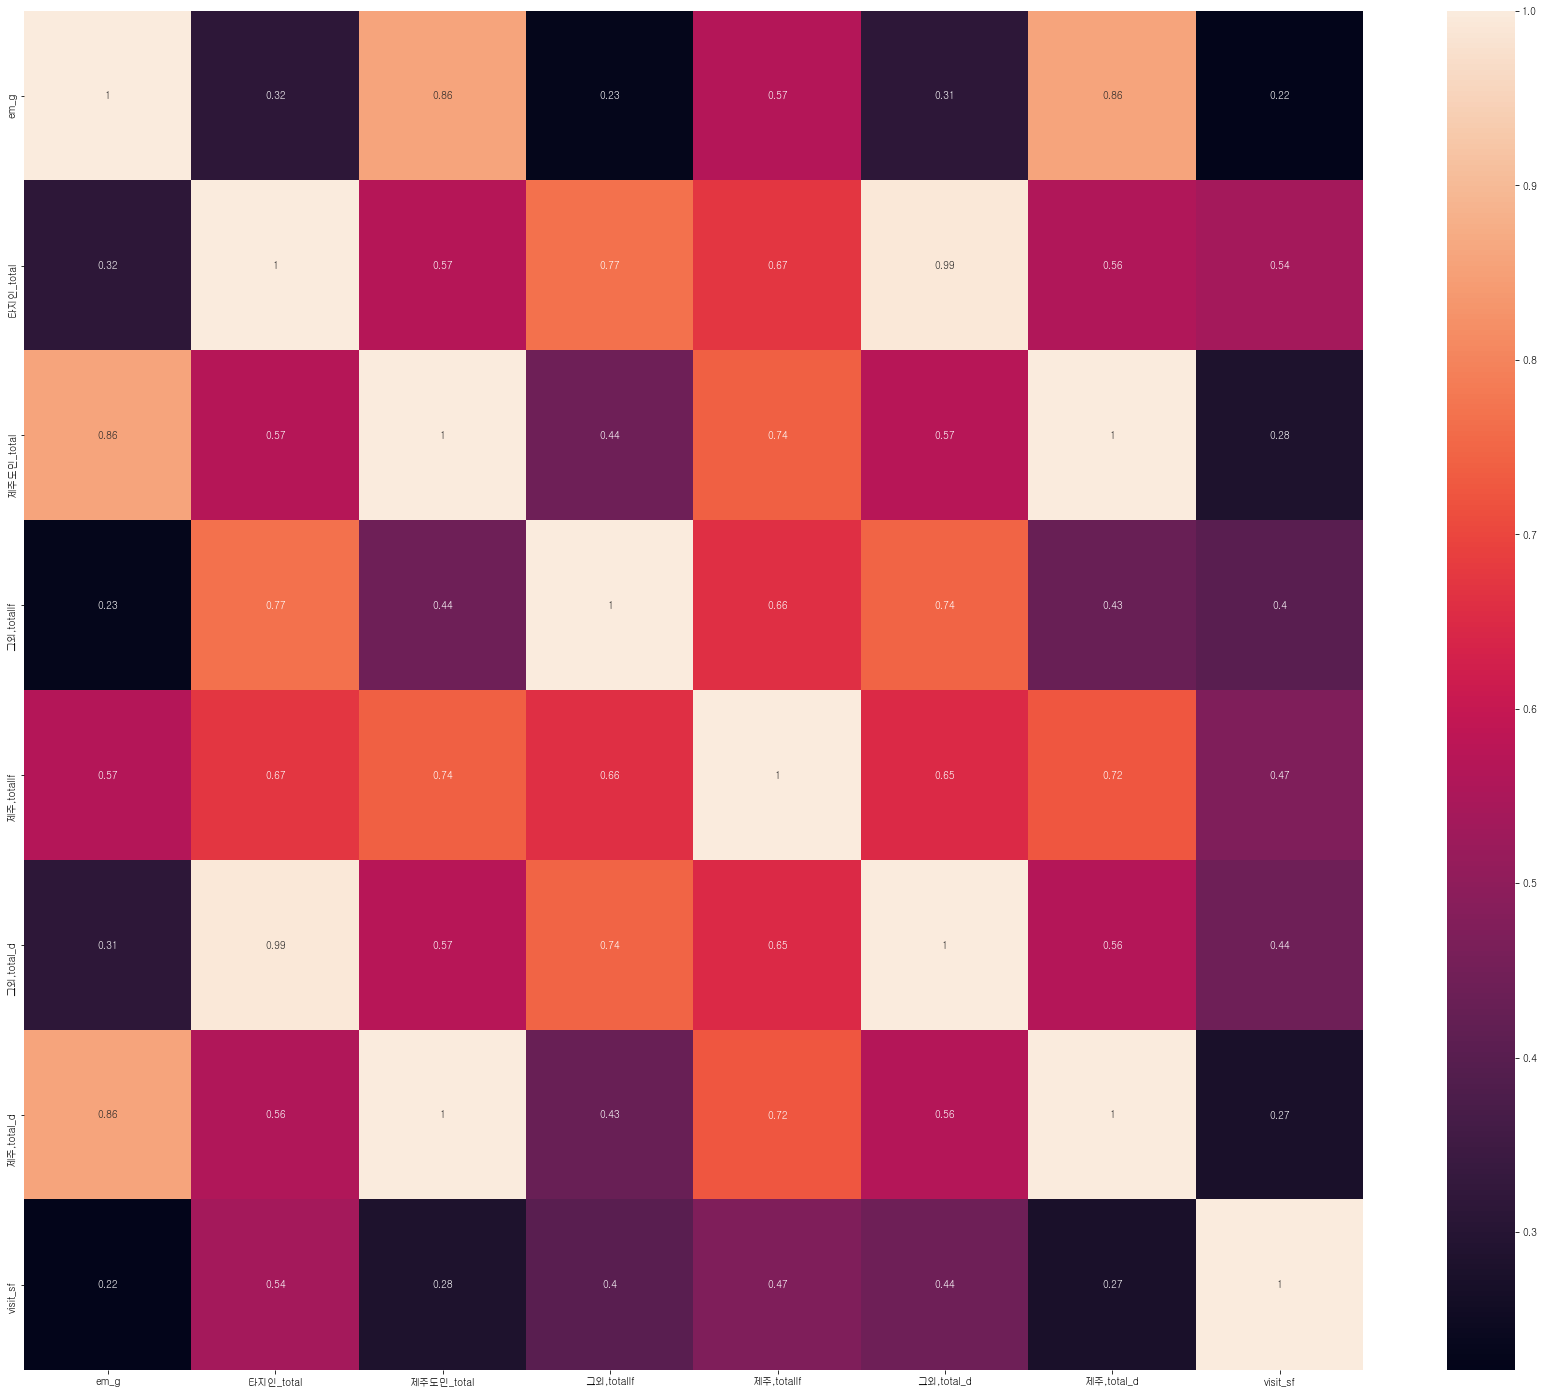

In [68]:
day_h_corr=day_h.corr()
plt.figure(figsize=(30, 25))
sns.heatmap(day_h_corr, annot=True)